In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.decomposition import PCA, KernelPCA


# Modelling Helpers
from scipy.stats import skew
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import scale, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.feature_selection import RFECV
from sklearn.metrics import fbeta_score, accuracy_score

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8 , 6

In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [3]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 数据展示

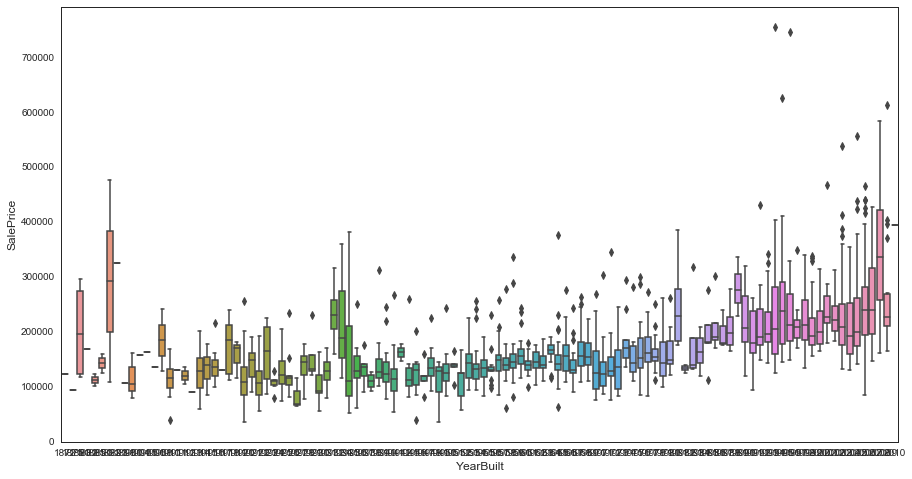

In [4]:
plt.figure(figsize=(15, 8))
sns.boxplot(train_df.YearBuilt, train_df.SalePrice)

(0, 800000)

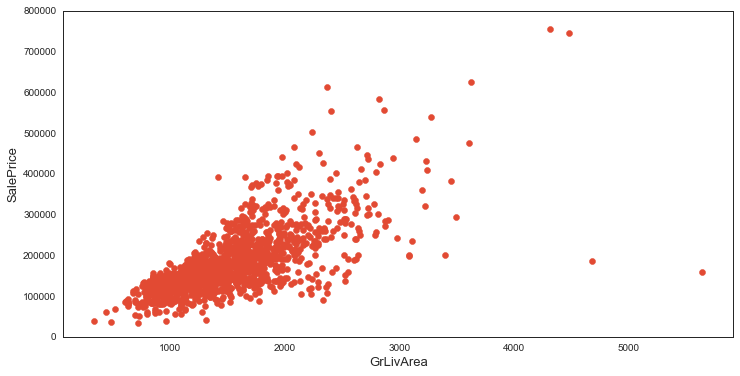

In [5]:
plt.figure(figsize=(12,6))
plt.scatter(x=train_df.GrLivArea, y=train_df.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

In [6]:
# 离群值处理
train_df.drop(train_df[(train_df["GrLivArea"] > 4000) & (train_df["SalePrice"] < 300000)].index, inplace=True)

In [7]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [8]:
df.drop(['Id'], axis=1, inplace=True)
df.shape

(2917, 80)

## 数据预处理

In [9]:
# 暂不知道为什么这样子填充，先空着
# full.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])
# full["LotAreaCut"] = pd.qcut(full.LotArea,10)
# full.groupby(['LotAreaCut'])[['LotFrontage']].agg(['mean','median','count'])
# full['LotFrontage']=full.groupby(['LotAreaCut','Neighborhood'])['LotFrontage']\
# .transform(lambda x: x.fillna(x.median()))
# # Since some combinations of LotArea and Neighborhood are not available, so we just LotAreaCut alone.
# full['LotFrontage']=full.groupby(['LotAreaCut'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [10]:
columns = df.columns.tolist()
columns.remove('SalePrice')
object_columns = df.columns[df.dtypes == 'object'].tolist()
num_columns = list(set(columns) - set(object_columns))

In [11]:
null_df = df[columns].isnull().mean()
tmp = null_df[null_df > 0].sort_values(ascending=False)
tmp

PoolQC          0.996915
MiscFeature     0.964004
Alley           0.932122
Fence           0.804251
FireplaceQu     0.486802
LotFrontage     0.166610
GarageQual      0.054508
GarageCond      0.054508
GarageFinish    0.054508
GarageYrBlt     0.054508
GarageType      0.053822
BsmtExposure    0.028111
BsmtCond        0.028111
BsmtQual        0.027768
BsmtFinType2    0.027425
BsmtFinType1    0.027083
MasVnrType      0.008228
MasVnrArea      0.007885
MSZoning        0.001371
BsmtFullBath    0.000686
BsmtHalfBath    0.000686
Utilities       0.000686
Functional      0.000686
Electrical      0.000343
BsmtUnfSF       0.000343
Exterior1st     0.000343
Exterior2nd     0.000343
TotalBsmtSF     0.000343
GarageArea      0.000343
GarageCars      0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
KitchenQual     0.000343
SaleType        0.000343
dtype: float64

In [12]:
tmp1 = tmp[tmp.values >= 0.002]
tmp2 = tmp[tmp.values < 0.002]

In [13]:
null_object_columns = list(set(tmp1.index) - set(num_columns))
null_num_columns = list(set(tmp1.index) - set(object_columns))
null_mode_columns = list(tmp2.index)
print('null_object_columns:{}'.format(null_object_columns))
print('null_num_columns:{}'.format(null_num_columns))
print('mode fill columns:{}'.format(null_mode_columns))

null_object_columns:['Fence', 'BsmtCond', 'Alley', 'FireplaceQu', 'GarageFinish', 'MiscFeature', 'BsmtFinType1', 'GarageType', 'BsmtFinType2', 'GarageCond', 'PoolQC', 'BsmtExposure', 'BsmtQual', 'MasVnrType', 'GarageQual']
null_num_columns:['GarageYrBlt', 'LotFrontage', 'MasVnrArea']
mode fill columns:['MSZoning', 'BsmtFullBath', 'BsmtHalfBath', 'Utilities', 'Functional', 'Electrical', 'BsmtUnfSF', 'Exterior1st', 'Exterior2nd', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'BsmtFinSF2', 'BsmtFinSF1', 'KitchenQual', 'SaleType']


### 填充空值

In [14]:
# cols = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish",  "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in null_object_columns:
    df[col].fillna("None", inplace=True)

In [15]:
# cols = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in null_num_columns:
    df[col].fillna(0, inplace=True)

In [16]:
# cols = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in null_mode_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [17]:
df.isnull().sum()[df.isnull().sum()>0]

SalePrice    1459
dtype: int64

# 特征工程

In [18]:
# for column in columns:
#     type_num = list(df[column].value_counts().index)
#     if len(type_num) <= 20:
#         print(column, type_num)

In [19]:
# 将一些数值特征转换为类别特征
num_str = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr",
          "KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in num_str:
    df[col] = df[col].astype(str)

In [20]:
# 转换规则以此为例
tmp = df.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])
tmp.sort_values(('SalePrice', 'median'))

SalePrice                
                     mean    median count
MSSubClass                               
180         102300.000000   88500.0    10
30           95829.724638   99900.0    69
45          108591.666667  107500.0    12
190         129613.333333  128250.0    30
50          143302.972222  132000.0   144
90          133541.076923  135980.0    52
85          147810.000000  140750.0    20
40          156125.000000  142500.0     4
160         138647.380952  146000.0    63
70          166772.416667  156000.0    60
20          185224.811567  159250.0   536
75          192437.500000  163500.0    16
80          169736.551724  166500.0    58
120         200779.080460  192000.0    87
60          240403.542088  216000.0   297
150                   NaN       NaN     0

In [21]:
def map_values():
    df["oMSSubClass"] = df.MSSubClass.map({'180': 1,
                                           '30': 2, '45': 2,
                                           '190': 3, '50': 3, '90': 3,
                                           '85': 4, '40': 4, '160': 4,
                                           '70': 5, '20': 5, '75': 5, '80': 5, '150': 5,
                                           '120': 6, '60': 6})

    df["oMSZoning"] = df.MSZoning.map({'C (all)': 1, 'RH': 2, 'RM': 2, 'RL': 3, 'FV': 4})

    df["oNeighborhood"] = df.Neighborhood.map({'MeadowV': 1,
                                               'IDOTRR': 2, 'BrDale': 2,
                                               'OldTown': 3, 'Edwards': 3, 'BrkSide': 3,
                                               'Sawyer': 4, 'Blueste': 4, 'SWISU': 4, 'NAmes': 4,
                                               'NPkVill': 5, 'Mitchel': 5,
                                               'SawyerW': 6, 'Gilbert': 6, 'NWAmes': 6,
                                               'Blmngtn': 7, 'CollgCr': 7, 'ClearCr': 7, 'Crawfor': 7,
                                               'Veenker': 8, 'Somerst': 8, 'Timber': 8,
                                               'StoneBr': 9,
                                               'NoRidge': 10, 'NridgHt': 10})

    df["oCondition1"] = df.Condition1.map({'Artery': 1,
                                           'Feedr': 2, 'RRAe': 2,
                                           'Norm': 3, 'RRAn': 3,
                                           'PosN': 4, 'RRNe': 4,
                                           'PosA': 5, 'RRNn': 5})

    df["oBldgType"] = df.BldgType.map({'2fmCon': 1, 'Duplex': 1, 'Twnhs': 1, '1Fam': 2, 'TwnhsE': 2})

    df["oHouseStyle"] = df.HouseStyle.map({'1.5Unf': 1,
                                           '1.5Fin': 2, '2.5Unf': 2, 'SFoyer': 2,
                                           '1Story': 3, 'SLvl': 3,
                                           '2Story': 4, '2.5Fin': 4})

    df["oExterior1st"] = df.Exterior1st.map({'BrkComm': 1,
                                             'AsphShn': 2, 'CBlock': 2, 'AsbShng': 2,
                                             'WdShing': 3, 'Wd Sdng': 3, 'MetalSd': 3, 'Stucco': 3, 'HdBoard': 3,
                                             'BrkFace': 4, 'Plywood': 4,
                                             'VinylSd': 5,
                                             'CemntBd': 6,
                                             'Stone': 7, 'ImStucc': 7})

    df["oMasVnrType"] = df.MasVnrType.map({'BrkCmn': 1, 'None': 1, 'BrkFace': 2, 'Stone': 3})

    df["oExterQual"] = df.ExterQual.map({'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

    df["oFoundation"] = df.Foundation.map({'Slab': 1,
                                           'BrkTil': 2, 'CBlock': 2, 'Stone': 2,
                                           'Wood': 3, 'PConc': 4})

    df["oBsmtQual"] = df.BsmtQual.map({'Fa': 2, 'None': 1, 'TA': 3, 'Gd': 4, 'Ex': 5})

    df["oBsmtExposure"] = df.BsmtExposure.map({'None': 1, 'No': 2, 'Av': 3, 'Mn': 3, 'Gd': 4})

    df["oHeating"] = df.Heating.map({'Floor': 1, 'Grav': 1, 'Wall': 2, 'OthW': 3, 'GasW': 4, 'GasA': 5})

    df["oHeatingQC"] = df.HeatingQC.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

    df["oKitchenQual"] = df.KitchenQual.map({'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

    df["oFunctional"] = df.Functional.map({'Maj2': 1, 'Maj1': 2, 'Min1': 2, 'Min2': 2, 'Mod': 2, 'Sev': 2, 'Typ': 3})

    df["oFireplaceQu"] = df.FireplaceQu.map({'None': 1, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

    df["oGarageType"] = df.GarageType.map({'CarPort': 1, 'None': 1,
                                           'Detchd': 2,
                                           '2Types': 3, 'Basment': 3,
                                           'Attchd': 4, 'BuiltIn': 5})

    df["oGarageFinish"] = df.GarageFinish.map({'None': 1, 'Unf': 2, 'RFn': 3, 'Fin': 4})

    df["oPavedDrive"] = df.PavedDrive.map({'N': 1, 'P': 2, 'Y': 3})

    df["oSaleType"] = df.SaleType.map({'COD': 1, 'ConLD': 1, 'ConLI': 1, 'ConLw': 1, 'Oth': 1, 'WD': 1,
                                       'CWD': 2, 
                                       'Con': 3, 'New': 3})

    df["oSaleCondition"] = df.SaleCondition.map({'AdjLand': 1, 
                                                 'Abnorml': 2, 'Alloca': 2, 'Family': 2, 
                                                 'Normal': 3, 'Partial': 4})

    return "Done!"

In [22]:
map_values()

'Done!'

In [23]:
# drop two unwanted columns
# df.drop("LotAreaCut", axis=1, inplace=True)
df.drop(['SalePrice'], axis=1, inplace=True)

Create family size and category for family size

In [24]:
class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        lab = LabelEncoder()
        X["YearBuilt"] = lab.fit_transform(X["YearBuilt"])
        X["YearRemodAdd"] = lab.fit_transform(X["YearRemodAdd"])
        X["GarageYrBlt"] = lab.fit_transform(X["GarageYrBlt"])
        return X

In [25]:
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self, skew=0.5):
        self.skew = skew
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_numeric = X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [26]:
# build pipeline
pipe = Pipeline([
    ('labenc', labelenc()),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [27]:
# save the original data for later use
df2 = df.copy()

In [28]:
data_pipe = pipe.fit_transform(df2)

In [29]:
data_pipe.shape

(2917, 405)

In [30]:
data_pipe.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,...,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,6.753438,854,0.0,706.0,0.0,150.0,0.000000,0,2,548.0,...,1,0,1,1,0,0,0,1,0,0
1,7.141245,0,0.0,978.0,0.0,284.0,0.000000,1,2,460.0,...,1,0,1,1,0,0,1,0,0,0
2,6.825460,866,0.0,486.0,0.0,434.0,0.000000,1,2,608.0,...,1,0,1,1,0,0,0,1,0,0
3,6.869014,756,0.0,216.0,0.0,540.0,5.609472,1,1,642.0,...,1,0,1,1,0,1,0,0,0,0
4,7.044033,1053,0.0,655.0,0.0,490.0,0.000000,1,2,836.0,...,1,0,1,1,0,0,0,1,0,0


In [31]:
scaler = RobustScaler()

In [32]:
n_train = train_df.shape[0]

x_train = data_pipe[:n_train]
x_test = data_pipe[n_train:]
y_train = train_df.SalePrice

x_train_scaled = scaler.fit(x_train).transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_log = np.log(y_train)
x_train = x_train_scaled
x_test = x_test_scaled

特征选择

In [33]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train, y_log)
FI_lasso = pd.DataFrame({"Feature Importance": lasso.coef_}, index=data_pipe.columns)
# FI_lasso.sort_values("Feature Importance",ascending=False)
# FI_lasso[FI_lasso["Feature Importance"] != 0].sort_values("Feature Importance").plot(kind="barh", figsize=(15,25))
# plt.xticks(rotation=90)
# plt.show()

基于上图的特性重要性和其他试错，可以向管道中添加如下特性

In [34]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional == 1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
            X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
            X["+_oMSZoning_TotalHouse"] = X["oMSZoning"] * X["TotalHouse"]
            X["+_oMSZoning_OverallQual"] = X["oMSZoning"] + X["OverallQual"]
            X["+_oMSZoning_YearBuilt"] = X["oMSZoning"] + X["YearBuilt"]
            X["+_oNeighborhood_TotalHouse"] = X["oNeighborhood"] * X["TotalHouse"]
            X["+_oNeighborhood_OverallQual"] = X["oNeighborhood"] + X["OverallQual"]
            X["+_oNeighborhood_YearBuilt"] = X["oNeighborhood"] + X["YearBuilt"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]
            
            X["-_oFunctional_TotalHouse"] = X["oFunctional"] * X["TotalHouse"]
            X["-_oFunctional_OverallQual"] = X["oFunctional"] + X["OverallQual"]
            X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
            X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
            X["-_oCondition1_TotalHouse"] = X["oCondition1"] * X["TotalHouse"]
            X["-_oCondition1_OverallQual"] = X["oCondition1"] + X["OverallQual"]
           
            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
    
            return X

In [35]:
# 通过使用管道，可以快速地试验不同的特性组合。
pipe = Pipeline([
    ('labenc', labelenc()),
    ('add_feature', add_feature(additional=2)),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [36]:
df_pipe = pipe.fit_transform(df)

In [37]:
df_pipe.shape

(2917, 426)

In [38]:
n_train = train_df.shape[0]

x_train = df_pipe[:n_train]
x_test = df_pipe[n_train:]
y_train = train_df.SalePrice

x_train_scaled = scaler.fit(x_train).transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_log = np.log(y_train)
x_train = x_train_scaled
x_test = x_test_scaled

In [44]:
x_train

array([[-2.69487673e+00, -2.26860387e+00,  5.82779598e-04, ...,
        -3.57135490e-16, -1.91990258e-16,  2.57538307e-16],
       [-2.32326807e-01,  1.72204767e-01, -6.86184755e-01, ...,
        -4.65548168e-17, -6.15394638e-17,  3.98456360e-16],
       [-3.29600380e+00, -1.59931814e+00, -2.09584367e-01, ...,
         8.15329598e-16, -5.33457973e-17,  1.15841419e-15],
       ...,
       [-2.26115092e+00,  1.42368695e+00,  2.06582612e+00, ...,
        -7.44369742e-18, -3.63868409e-16, -1.33918225e-16],
       [ 3.37501879e+00,  4.86196353e+00, -2.80586354e+00, ...,
        -7.66090048e-17, -1.54713282e-16,  1.66768888e-16],
       [ 1.38018144e+00,  2.98927823e+00, -4.32081569e+00, ...,
        -1.03921279e-16, -1.44077223e-16, -8.64103124e-17]])

In [43]:
y_log

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1458, dtype: float64

In [39]:
# 特征构建时，导致一些特征相关性很强，使用PCA降低特征的维度
pca = PCA(n_components=410)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [40]:
x_train.shape, x_test.shape

((1458, 410), (1459, 410))

In [42]:
np.savez_compressed('../data/x_train.npz', x_train=x_train)
np.savez_compressed('../data/y_train.npz', y_train=y_log)
np.savez_compressed('../data/x_test.npz', x_test=x_test)